<a href="https://colab.research.google.com/github/sangammgr88/Machine_Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('/content/archive.zip')
df

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,West,20
234,235,38,59000,430,6.9,North,20
235,236,54,74000,630,9.4,South,27
236,237,32,52000,360,5.8,West,18


In [8]:
#Dropping the unwanted columns.
df.drop(columns = ['region','purchase_frequency','purchase_amount','annual_income'], inplace= True)


In [9]:
df

,user_id,age,loyalty_score
0,1,25,4.5
1,2,34,7.0
2,3,45,8.0
3,4,22,3.0
4,5,29,4.8
...,...,...,...
233,234,40,7.2
234,235,38,6.9
235,236,54,9.4
236,237,32,5.8


In [10]:
df.isnull().sum()

,0
user_id,0
age,0
loyalty_score,0


In [11]:
#To Find the Null or missing values in each Column in Percentage.
(df.isnull().sum()*100)/df.shape[0]

,0
user_id,0.0
age,0.0
loyalty_score,0.0


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

,0
user_id,0
age,0
loyalty_score,0


In [14]:
#Noarmalization...
b = (df['loyalty_score'] - df['loyalty_score'].min())/(df['loyalty_score'].max()- df['loyalty_score'].min())
b

,loyalty_score
0,0.230769
1,0.615385
2,0.769231
3,0.000000
4,0.276923
...,...
233,0.646154
234,0.600000
235,0.984615
236,0.430769


In [16]:
features = df.drop('loyalty_score', axis = 1)
target = df['loyalty_score']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Training and Testing the sets.
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
model.score(X_test,y_test)

0.9923009150683236

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
#Predicting  on Training and Testing .
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [46]:
# Training set performance
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print or use the calculated metrics as needed
print(f'Mean Squared Error: {train_mse}')
print(f'R-squared: {train_r2}')

Mean Squared Error: 2.6468359319915527e-31
R-squared: 1.0


In [48]:
# Testing set performance
from sklearn.metrics import mean_squared_error, r2_score

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print or use the calculated metrics as needed
print(f'Mean Squared Error: {test_mse}')
print(f'R-squared: {test_r2}')

Mean Squared Error: 0.029166666666666646
R-squared: 0.9923009150683236


In [53]:
#Predicting the strokes

model.predict([[1,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3.2])

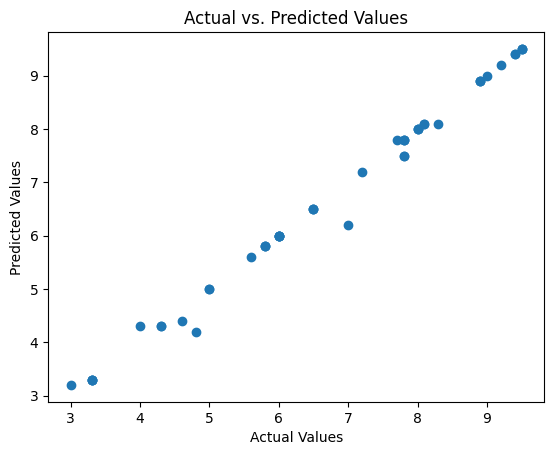

In [60]:
import matplotlib.pyplot as plt

# Assuming you have y_test (actual values) and y_test_pred (predicted values)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

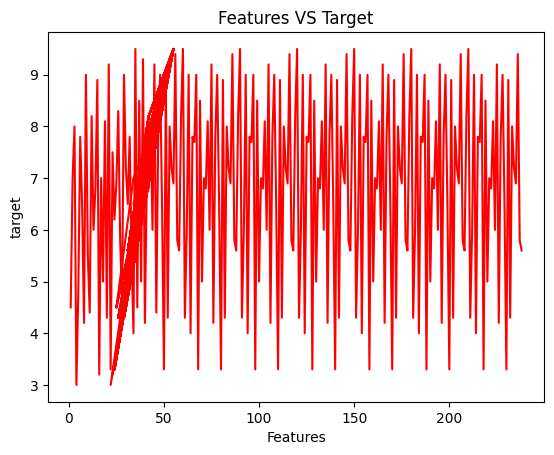

In [61]:
plt.plot(features,target,'r')
plt.xlabel('Features')
plt.ylabel('target')
plt.title('Features VS Target')
plt.show()